In [1]:
import pandas as pd

In [2]:
# Read the csv
crypto_df = pd.read_csv('crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Drop the IsTrading column from the dataframe
df = crypto_df.drop('IsTrading', axis=1)
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [6]:
# Check null values
df.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    508
TotalCoinSupply      0
dtype: int64

In [9]:
# Remove all rows that have at least one null value.
clean_df = df.dropna()
clean_df.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [10]:
# Filter for cryptocurrencies that have been mined
mined_df = clean_df[clean_df["TotalCoinsMined"]> 0]
mined_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [17]:
# Delete the CoinName and Unnamed:0 from the original dataframe
coin_df = mined_df.drop(['CoinName', 'Unnamed: 0'], axis=1)
coin_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [18]:
# Convert the remaining features with text values, Algorithm and ProofType, into numerical data
X = pd.get_dummies(coin_df, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,1.283270e+05,1000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are 577 rows and 101 columns. We got rid of the null values and filtered coins mined greather than 0. The columns are for the different values of algorithm and prooftype elements, whichs is around 100 different values.

In [19]:
# Standardize your dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)

In [22]:
# Perform dimensionality reduction with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca_df = pd.DataFrame(crypto_pca)
crypto_pca_df

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,-0.325873,1.139894,-0.558793,0.001330,1.699478e-14,-4.504798e-14,-7.580620e-14,-0.013586,-1.228595,-0.061216,...,-3.521609e-15,2.035967e-15,1.431788e-15,-1.035498e-15,5.599995e-15,5.286792e-15,3.568343e-15,-4.012687e-15,5.667734e-15,4.776398e-16
1,-0.308532,1.140123,-0.559208,0.001318,1.780323e-14,-4.700217e-14,-7.447913e-14,-0.014233,-1.231987,-0.064990,...,-3.587335e-15,3.230553e-15,1.166399e-15,-7.593901e-17,3.581149e-15,5.465905e-15,3.257770e-15,-2.548006e-15,6.455911e-15,-2.859776e-16
2,2.420490,1.717799,-0.635946,0.004728,3.001938e-14,-5.995997e-14,-1.268621e-13,-0.064570,-1.575150,-0.732407,...,1.093325e-13,-8.901719e-14,-1.060964e-15,2.108737e-14,-7.953973e-14,-3.756605e-14,-2.176210e-13,1.355310e-13,1.568073e-14,6.567732e-14
3,-0.138908,-1.349133,0.166846,-0.001204,-2.888982e-15,1.265327e-14,2.924192e-14,0.001798,0.181201,0.226610,...,8.230714e-15,-2.513811e-14,-1.295075e-15,8.726395e-15,-8.747355e-15,-1.596859e-15,-2.008481e-14,2.234067e-14,1.742469e-15,4.910236e-15
4,-0.135897,-2.110498,0.357371,-0.001688,-1.512102e-14,2.865998e-14,5.719662e-14,0.033395,0.359324,0.193160,...,-1.798615e-13,-5.043847e-14,2.485085e-14,-5.220025e-14,1.061867e-14,1.831914e-14,9.364290e-14,5.763282e-14,1.766796e-15,3.856670e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,-0.323844,1.139786,-0.558823,0.001332,1.765358e-14,-4.672700e-14,-7.471313e-14,-0.013613,-1.229063,-0.061712,...,-3.585942e-15,3.550938e-15,5.185643e-16,1.656501e-16,3.572754e-15,5.042768e-15,4.039927e-15,-3.244434e-15,7.008257e-15,-3.610936e-16
573,0.323033,-2.354008,0.374493,-0.001278,-1.191177e-14,2.865133e-14,5.785714e-14,0.022914,-0.030530,0.042516,...,-5.713718e-14,-4.666269e-14,4.451737e-16,1.687263e-14,1.424805e-14,9.491776e-15,2.488877e-14,4.815497e-14,6.765515e-15,1.443271e-15
574,-0.150690,-2.076767,0.380761,-0.001709,-1.309270e-14,3.147458e-14,6.090601e-14,0.035645,0.476849,0.258569,...,8.042240e-15,7.189866e-16,4.071033e-15,2.568834e-15,-1.657243e-15,1.208879e-14,-1.231356e-16,4.508234e-15,1.174020e-15,-3.858340e-16
575,-0.279989,0.792129,-0.256736,0.000479,7.462223e-15,-1.985933e-14,-3.797160e-14,-0.024881,0.962765,-0.736184,...,-6.954107e-15,-5.564804e-16,1.051321e-15,8.144917e-16,4.315800e-15,2.914805e-15,1.035832e-15,-2.783655e-15,9.039431e-15,2.742842e-15


The amount of columns reduced to 77

In [23]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results.
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(crypto_pca_df)
tsne_features.shape

(577, 2)

Only 2 columns are left

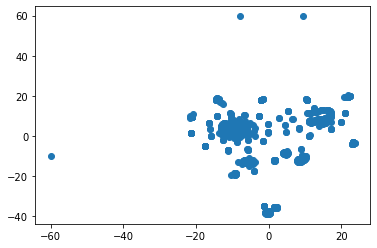

In [24]:
# Plot
import matplotlib.pyplot as plt

plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [25]:
# Use a for-loop to determine the inertia for each k between 1 through 10
from sklearn.cluster import KMeans

inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_iris)
    inertia.append(km.inertia_)

NameError: name 'df_iris' is not defined